In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_clean = pd.read_csv('data_clean.csv')
regions = data_clean['Region'].unique()

#Separate regions into their respective continents\
df_dict = {}
for region in regions:
    df_dict['df_{}'.format(region)] = data_clean[
        data_clean['Region'].apply(lambda x: str(region) in str(x))]
    
europe = df_dict['df_Balkans'].append(
    df_dict['df_Southern Europe']).append(
        df_dict['df_Eastern Europe']).append(
            df_dict['df_Western Europe']).append(
                df_dict['df_Northern Europe'])

europe.to_csv('bycontinent/europe.csv')
                
asia = df_dict['df_South Asia'].append(
    df_dict['df_Middle East']).append(
        df_dict['df_Southeast Asia']).append(
            df_dict['df_East Asia']).append(
                df_dict['df_Central Asia'])

asia.to_csv('bycontinent/asia.csv')

africa = df_dict['df_North Africa'].append(
    df_dict['df_Southern Africa']).append(
        df_dict['df_West Africa']).append(
            df_dict['df_East Africa']).append(
                df_dict['df_Central Africa'])

africa.to_csv('bycontinent/africa.csv')

north_america = df_dict['df_North America'].append(
    df_dict['df_Central America']).append(
        df_dict['df_Caribbean'])

north_america.to_csv('bycontinent/north_america.csv')

south_america = df_dict['df_South America']

south_america.to_csv('bycontinent/south_america.csv')

oceania = df_dict['df_Oceania']

oceania.to_csv('bycontinent/oceania.csv')
del(df_dict)


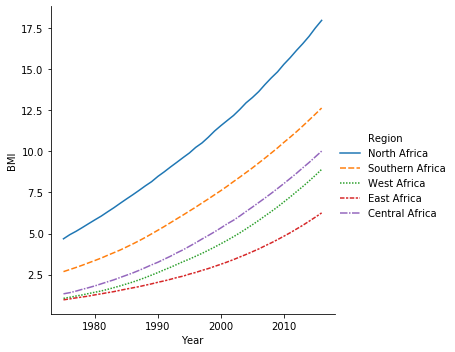

In [31]:
sns.relplot(data = africa, kind = 'line',
           x = 'Year', y = 'BMI', hue = 'Region', style = 'Region', ci = None)

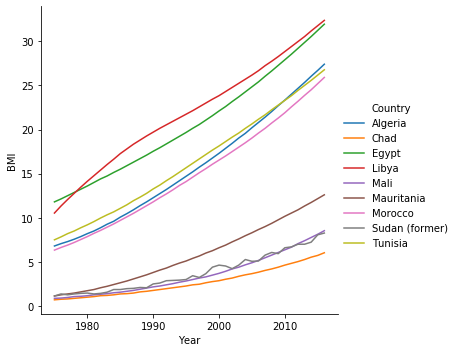

In [27]:
north_africa = africa[africa['Region'] == 'North Africa']
north_africa = north_africa.where(north_africa['Country'] = 'Sudan').dropna()
sns.relplot(data = north_africa, kind = 'line',
           x = 'Year', y = 'BMI', hue = 'Country', ci = None)